<a href="https://colab.research.google.com/github/leobertolazzi/it5-dantean-styletransfer/blob/main/dataset/ita2dante_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ita2dante Dataset Analysis

The ita2dante dataset contains all the sentences from Dante's "Divine Comedy" along with paraphrases in contemporary italian. There are approximately 6k pairs of aligned sentences and paraphrases in it.

This notebook contains an analysis of some linguistic features of the dataset

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import re
from matplotlib import pyplot as plt

plt.style.use('ggplot')

In [ ]:
path = '.../ita2dante.csv'

df = pd.read_csv(path)
df = df.applymap(str)

italian = df['italian']
dante = df['dante']

### 1. Vocabulary

In [ ]:
def token_type(list_of_sents):
    """
    Create two list with tokens and types
    from a list of sentences 
    """

    tok = []
    for sent in list_of_sents:
        sent = sent.lower()
        sent = re.sub(r"""[\!"#$%&'\(\)\*\+, -\./:;<=>’\?@\[\\\]^_`{\|}~]""", r" ", sent)
        for word in sent.split(" "):
            if word != "":
                tok.append(word)
    
    type = set(tok)

    return tok, type

In [ ]:
ita_tok, ita_type = token_type(italian)
dante_tok, dante_type = token_type(dante)

print(f'Italian\nN. Tokens : {len(ita_tok)}\nN. Types : {len(ita_type)}\nType / Token ratio : {"%0.02f"%(len(ita_type)/len(ita_tok))}')
print(f'\nDante\nN. Tokens : {len(dante_tok)}\nN. Types : {len(dante_type)}\nType / Token ratio : {"%0.02f"%(len(dante_type)/len(dante_tok))}')

Italian
N. Tokens : 107402
N. Types : 12414
Type / Token ratio : 0.12

Dante
N. Tokens : 100963
N. Types : 12792
Type / Token ratio : 0.13


N.B. token & type count was performed **without** a prior lemmatization

### 2. Sentence length

In [ ]:
def average_sentence_length(list_of_sents):
    """
    Compute the average sentence length
    from a list of sentences
    """

    total = 0

    for sent in list_of_sents:
        sent = sent.lower()
        sent = re.sub(r"""[\!"#$%&'\(\)\*\+, -\./:;<=>’\?@\[\\\]^_`{\|}~]""", r" ", sent)
        tokens = []
        for word in sent.split(" "):
            if word != "":
                tokens.append(word)
        total += len(tokens)
    
    average = (total/len(list_of_sents))

    return average

In [ ]:
def sentence_lenght_dicts(list_of_sents):
    """
    Create a dictionary with length ranges as keys
    and the number of sentences in those ranges as values
    """

    freq_dict = {"1-10":0, "11-20":0, "21-30":0, "31-40":0, "41-50":0, "51-60":0, "61-70":0, "71-80":0}
    for sent in list_of_sents:

        sent = sent.lower()
        sent = re.sub(r"""[\!"#$%&'\(\)\*\+, -\./:;<=>’\?@\[\\\]^_`{\|}~]""", r" ", sent)
        tokens = []
        for word in sent.split(" "):
            if word != "":
                tokens.append(word)

        if len(tokens) < 11:
            freq_dict["1-10"] += 1
        elif len(tokens) < 21:
            freq_dict["11-20"] += 1
        elif len(tokens) < 31:
            freq_dict["21-30"] += 1
        elif len(tokens) < 41:
            freq_dict["31-40"] += 1
        elif len(tokens) < 51:
            freq_dict["41-50"] += 1
        elif len(tokens) < 61:
            freq_dict["51-60"] += 1
        elif len(tokens) < 71:
            freq_dict["61-70"] += 1
        else:
            freq_dict["71-80"] += 1

    return freq_dict
            

In [ ]:
avg_ita = average_sentence_length(italian)
avg_dante = average_sentence_length(dante)

print(f'Average sentence length - Italian:\n{"%0.02f"%avg_ita}')
print(f'\nAverage sentence length - Dante:\n{"%0.02f"%avg_dante}')

Average sentence length - Italian:
18.19

Average sentence length - Dante:
17.10


In [ ]:
dict_ita = sentence_lenght_dicts(italian)
dict_dante = sentence_lenght_dicts(dante)

print("Italian:")
print("{:<10} {:<10}".format('Length', 'Frequency'))

for key, value in dict_ita.items():
    print("{:<10} {:<10}".format(key, value))

print("\n\nDante:")
print("{:<10} {:<10}".format('Length', 'Frequency'))

for key, value in dict_dante.items():
    print("{:<10} {:<10}".format(key, value))

Italian:
Length     Frequency 
1-10       1695      
11-20      1874      
21-30      1718      
31-40      294       
41-50      246       
51-60      52        
61-70      16        
71-80      10        


Dante:
Length     Frequency 
1-10       1813      
11-20      2071      
21-30      1496      
31-40      226       
41-50      254       
51-60      16        
61-70      27        
71-80      2         


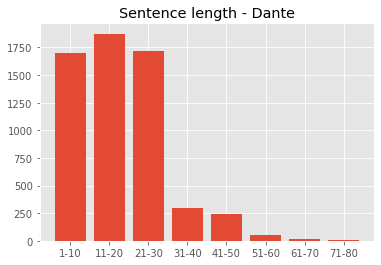

In [ ]:
plt.bar(range(len(dict_ita)), list(dict_ita.values()), align='center')
plt.xticks(range(len(dict_ita)), list(dict_ita.keys()))
plt.title('Sentence length - Dante')
#plt.savefig('/content/drive/My Drive/ita2dante/dante.png', dpi=800)
plt.show()

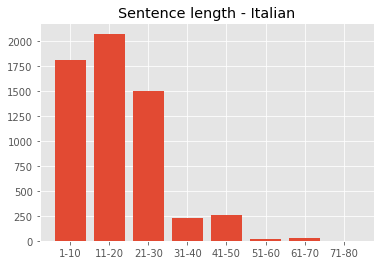

In [ ]:
plt.bar(range(len(dict_dante)), list(dict_dante.values()), align='center')
plt.xticks(range(len(dict_dante)), list(dict_dante.keys()))
plt.title('Sentence length - Italian')
#plt.savefig('/content/drive/My Drive/ita2dante/italian.png', dpi=800)
plt.show()